
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset into the tool. 

In [3]:
data=pd.read_csv("Mall_Customers.csv")

# Visualizations.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


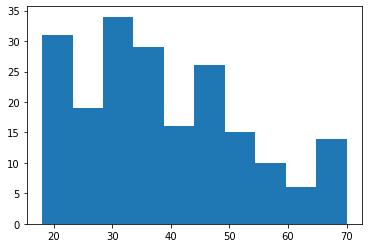

In [6]:
plt.hist(data['Age'])
plt.show()

/Users/tejeshwinirs/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

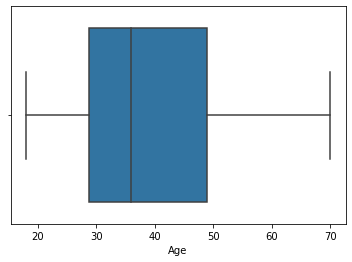

In [7]:
sns.boxplot(data['Age'])

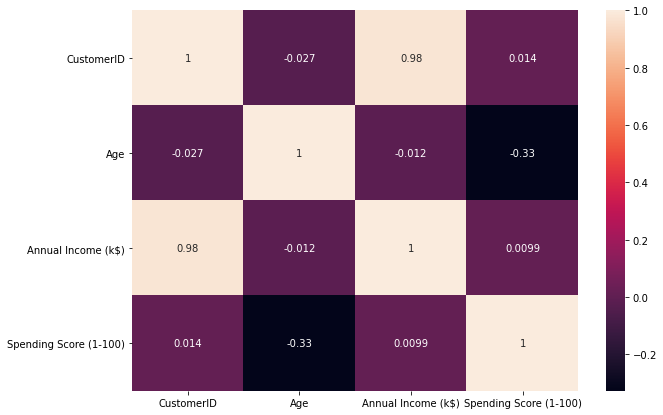

In [8]:
plt.figure(figsize=(10,7))
corr=data.corr()
sns.heatmap(corr,xticklabels = corr.columns.values,yticklabels = corr.columns.values,annot = True);

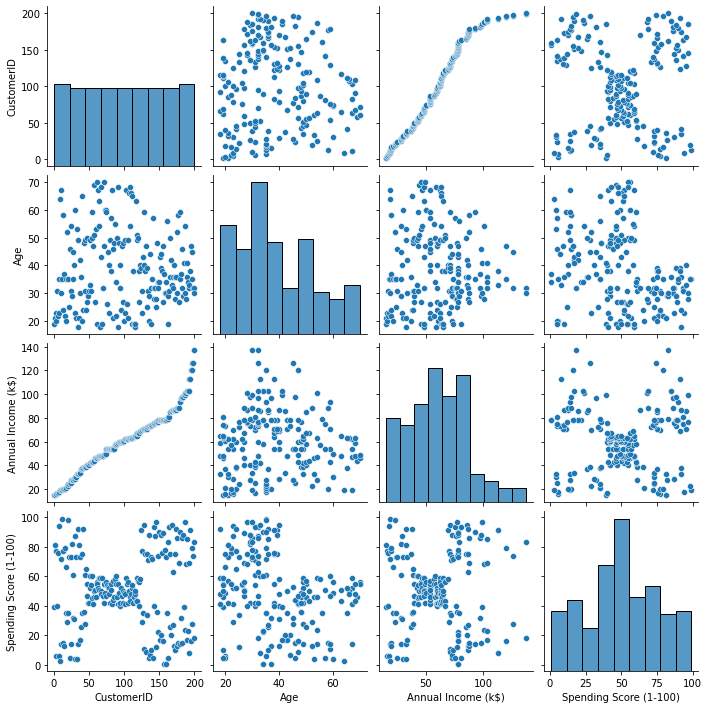

In [9]:
sns.pairplot(data)

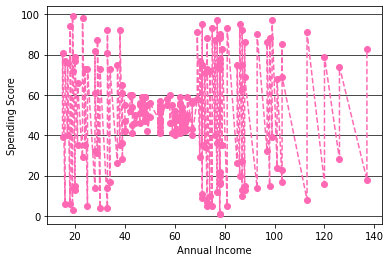

In [10]:
x=data['Annual Income (k$)']
y=data['Spending Score (1-100)']
plt.plot(x,y,marker = 'o',linestyle = 'dashed',color = 'hotpink')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(axis='y',color='black',linewidth=0.7)
plt.show()

<BarContainer object of 200 artists>

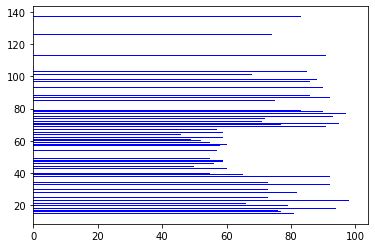

In [11]:
plt.barh(x,y,color='b',height=0.5)

# Perform descriptive statistics on the dataset.

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.tail(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
print("MEAN\n",data.mean())

MEAN
 CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64


In [15]:
print("MEDIAN\n",data.median())

MEDIAN
 CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64


In [16]:
print("MODE\n",data.mode())

MODE
      CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0             1  Female  32.0                54.0                    42.0
1             2     NaN   NaN                78.0                     NaN
2             3     NaN   NaN                 NaN                     NaN
3             4     NaN   NaN                 NaN                     NaN
4             5     NaN   NaN                 NaN                     NaN
..          ...     ...   ...                 ...                     ...
195         196     NaN   NaN                 NaN                     NaN
196         197     NaN   NaN                 NaN                     NaN
197         198     NaN   NaN                 NaN                     NaN
198         199     NaN   NaN                 NaN                     NaN
199         200     NaN   NaN                 NaN                     NaN

[200 rows x 5 columns]


In [17]:
data.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [18]:
data.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [19]:
data['Age'].max()-data['Age'].min()

52

In [20]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [22]:
data.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

# Check for Missing values and deal with them.

In [23]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
data.columns.isnull()

array([False, False, False, False, False])

In [25]:
data['Age'].fillna(data['Age'].mean())

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

# Find the outliers and replace them outliers

In [26]:
def remove_outlier(dataset,col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR

    for i in data.index:
        if col[i]>upper_bound:
            col[i]=lower_bound
        if col[i]>upper_bound:
            col[i]=upper_bound




In [27]:
remove_outlier(data,data["CustomerID"])
remove_outlier(data,data["Age"])
remove_outlier(data,data["Annual Income (k$)"])
remove_outlier(data,data["Spending Score (1-100)"])

<ipython-input-26-75c197ba5cb9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=lower_bound


In [28]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,59.060000,50.200000
std,57.879185,13.969007,26.138718,25.823522
min,1.000000,18.000000,-13.000000,1.000000
25%,50.750000,28.750000,40.000000,34.750000
50%,100.500000,36.000000,60.500000,50.000000
75%,150.250000,49.000000,77.250000,73.000000
max,200.000000,70.000000,126.000000,99.000000


# Check for Categorical columns and perform encoding.

In [29]:
encoder=LabelEncoder()
encoder.fit(data['Gender'])
values=encoder.transform(data['Gender'])

In [30]:
print("Before Encoding:",list(data['Gender'][-2:]))
print("After Encoding:", values[-2:])
print("The inverse from the encoding result:",encoder.inverse_transform(values[-2:]))

Before Encoding: ['Male', 'Male']
After Encoding: [1 1]
The inverse from the encoding result: ['Male' 'Male']


In [31]:
encoded_data=data.copy()

In [32]:
encoded_data=pd.get_dummies(encoded_data,columns = ['Gender'])

In [33]:
encoded_data.head(4)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0


# Split the data into dependent and independent variables.

In [34]:
X = encoded_data.drop("Spending Score (1-100)",axis=1)
Y = encoded_data['Spending Score (1-100)']

# Scale the independent variables

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(X)

In [37]:
print(x_scaled)

[[-1.72341210e+00 -1.42456879e+00 -1.68985202e+00 -1.12815215e+00
   1.12815215e+00]
 [-1.70609137e+00 -1.28103541e+00 -1.68985202e+00 -1.12815215e+00
   1.12815215e+00]
 [-1.68877065e+00 -1.35280210e+00 -1.65149859e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.67144992e+00 -1.13750203e+00 -1.65149859e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.65412920e+00 -5.63368514e-01 -1.61314516e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.63680847e+00 -1.20926872e+00 -1.61314516e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.61948775e+00 -2.76301755e-01 -1.57479173e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.60216702e+00 -1.13750203e+00 -1.57479173e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.58484630e+00  1.80493225e+00 -1.53643831e+00 -1.12815215e+00
   1.12815215e+00]
 [-1.56752558e+00 -6.35135204e-01 -1.53643831e+00  8.86405260e-01
  -8.86405260e-01]
 [-1.55020485e+00  2.02023231e+00 -1.53643831e+00 -1.12815215e+00
   1.12815215e+00]
 [-1.53288413e+00 -2.76301755e-01 -1.53643831e+00  8.86405260e-01

# Split the data into training and testing

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=40)

In [39]:
x_train.shape

(160, 5)

In [40]:
x_test.shape

(40, 5)

In [41]:
y_test.shape

(40,)

In [42]:
y_train.shape

(160,)

# Build the Model

In [43]:
x = encoded_data.iloc[:, [3, 4]].values  

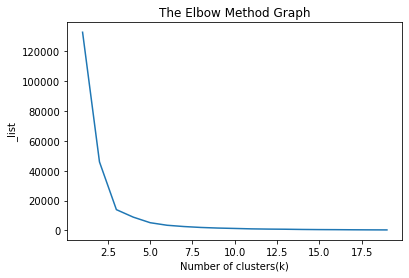

In [44]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
_list= []  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state= 42)  
    kmeans.fit(x)  
    _list.append(kmeans.inertia_)  
plt.plot(range(1, 20), _list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('_list')  
plt.show() 

# Train the Model & Test the Model

In [45]:
km=KMeans(n_clusters=3,init='k-means++')  
y_pred= km.fit_predict(x) 

# Evalutaion

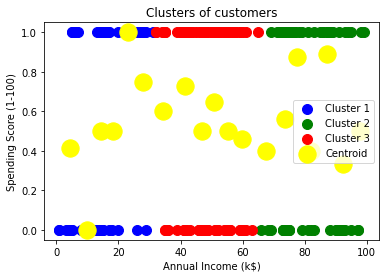

In [46]:
#visulaizing the clusters  
plt.scatter(x[y_pred== 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_pred== 1, 0], x[y_pred== 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_pred== 2, 0], x[y_pred== 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  